# Capstone
## Online News Popularity

---

## Exploring the Data

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import visuals as vs

%matplotlib inline

data_raw = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv', sep=',\s', engine='python', index_col=False)
# drop non-predictive variables: url, timedelta
data = data_raw.drop(['url','timedelta'], axis=1)
display(data.head(n=2))
# data completeness checking
anymissing = 'No' if not data.isnull().values.any() else ''
print 'The dataset has '+anymissing+' missing value.\n'
print('Total number of samples: {}'.format(data.shape[0]))
print('Total number of features: {}'.format(data.shape[1]-1))

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711


The dataset has No missing value.

Total number of samples: 39644
Total number of features: 58


**Attributes Information**: Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

| Aspect | Features | 
| :---         |     :---:      |
| Words   | Number of words of the title/content; Average word length; Rate of unique/non-stop words of contents |
| Links   | Number of links; Number of links to other articles in Mashable  |
| Digital Media| Number of images/videos |
| Publication Time | Day of the week/weekend |
| Keywords | Number of keywords; Worst/best/average keywords (#shares) |
| NLP | Closeness to five LDA topics; Title/Text polarity/subjectivity; Rate and polarity of positive/negative words; Absolute subjectivity/polarity level|
| **Target** | Number of shares at Mashable |

**Attributes Information:**
Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field) 

Attribute Information: 
0. url: URL of the article (non-predictive) 
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive) 
2. n_tokens_title: Number of words in the title 
3. n_tokens_content: Number of words in the content 
4. n_unique_tokens: Rate of unique words in the content 
5. n_non_stop_words: Rate of non-stop words in the content 
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
7. num_hrefs: Number of links 
8. num_self_hrefs: Number of links to other articles published by Mashable 
9. num_imgs: Number of images 
10. num_videos: Number of videos 
11. average_token_length: Average length of the words in the content 
12. num_keywords: Number of keywords in the metadata 
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? 
14. data_channel_is_entertainment: Is data channel 'Entertainment'? 
15. data_channel_is_bus: Is data channel 'Business'? 
16. data_channel_is_socmed: Is data channel 'Social Media'? 
17. data_channel_is_tech: Is data channel 'Tech'? 
18. data_channel_is_world: Is data channel 'World'? 
19. kw_min_min: Worst keyword (min. shares) 
20. kw_max_min: Worst keyword (max. shares) 
21. kw_avg_min: Worst keyword (avg. shares) 
22. kw_min_max: Best keyword (min. shares) 
23. kw_max_max: Best keyword (max. shares) 
24. kw_avg_max: Best keyword (avg. shares) 
25. kw_min_avg: Avg. keyword (min. shares) 
26. kw_max_avg: Avg. keyword (max. shares) 
27. kw_avg_avg: Avg. keyword (avg. shares) 
28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
29. self_reference_max_shares: Max. shares of referenced articles in Mashable 
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 
31. weekday_is_monday: Was the article published on a Monday? 
32. weekday_is_tuesday: Was the article published on a Tuesday? 
33. weekday_is_wednesday: Was the article published on a Wednesday? 
34. weekday_is_thursday: Was the article published on a Thursday? 
35. weekday_is_friday: Was the article published on a Friday? 
36. weekday_is_saturday: Was the article published on a Saturday? 
37. weekday_is_sunday: Was the article published on a Sunday? 
38. is_weekend: Was the article published on the weekend? 
39. LDA_00: Closeness to LDA topic 0 
40. LDA_01: Closeness to LDA topic 1 
41. LDA_02: Closeness to LDA topic 2 
42. LDA_03: Closeness to LDA topic 3 
43. LDA_04: Closeness to LDA topic 4 
44. global_subjectivity: Text subjectivity 
45. global_sentiment_polarity: Text sentiment polarity 
46. global_rate_positive_words: Rate of positive words in the content 
47. global_rate_negative_words: Rate of negative words in the content 
48. rate_positive_words: Rate of positive words among non-neutral tokens 
49. rate_negative_words: Rate of negative words among non-neutral tokens 
50. avg_positive_polarity: Avg. polarity of positive words 
51. min_positive_polarity: Min. polarity of positive words 
52. max_positive_polarity: Max. polarity of positive words 
53. avg_negative_polarity: Avg. polarity of negative words 
54. min_negative_polarity: Min. polarity of negative words 
55. max_negative_polarity: Max. polarity of negative words 
56. title_subjectivity: Title subjectivity 
57. title_sentiment_polarity: Title polarity 
58. abs_title_subjectivity: Absolute subjectivity level 
59. abs_title_sentiment_polarity: Absolute polarity level 
60. shares: Number of shares (target)

In [2]:
# find the features that should be treated as categorical
colnames = data.drop('shares',axis=1).columns
is_categorical = ['is_' in name for name in colnames]
# get the index of numerical features
index_numerical = [i for i,x in enumerate(is_categorical) if not x]
numerical_colnames = colnames[index_numerical]
colnames_list = list(numerical_colnames)
print 'Number of numerical features: {}'.format(len(colnames_list))
print 'Number of categorial features: {}'.format(sum(is_categorical))

Number of numerical features: 44
Number of categorial features: 14


### Summary statistics of numerical variables

In [3]:
numerical_feature = data.loc[:,colnames_list]
for i in range(int(numerical_feature.shape[1]/10)+1):
    if (i+1)*10 <= numerical_feature.shape[1]:
        index = range(i*10,(i+1)*10)
        display(numerical_feature.iloc[:,index].describe().drop('count',axis=0))
    else:
        display(numerical_feature.iloc[:,i*10:].describe().drop('count',axis=0))

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534


,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
mean,7.223767,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639
std,1.909130,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397
min,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,6.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566
50%,7.000000,-1.000000,660.000000,235.500000,1400.000000,843300.000000,244572.222223,1023.635611,4355.688836,2870.074878
75%,9.000000,4.000000,1000.000000,357.000000,7900.000000,843300.000000,330980.000000,2056.781032,6019.953968,3600.229564
max,10.000000,377.000000,298400.000000,42827.857143,843300.000000,843300.000000,843300.000000,3613.039820,298400.000000,43567.659946


,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity
mean,3998.755396,10329.212662,6401.697580,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309
std,19738.670516,41027.576613,24211.332231,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750
25%,639.000000,1100.000000,981.187500,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757
50%,1200.000000,2800.000000,2200.000000,0.033387,0.033345,0.040004,0.040001,0.040727,0.453457,0.119117
75%,2600.000000,8000.000000,5200.000000,0.240958,0.150831,0.334218,0.375763,0.399986,0.508333,0.177832
max,843300.000000,843300.000000,843300.000000,0.926994,0.925947,0.919999,0.926534,0.927191,1.000000,0.727841


,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity
mean,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500
std,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000
50%,0.039023,0.015337,0.710526,0.280000,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000
75%,0.050279,0.021739,0.800000,0.384615,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000
max,0.155488,0.184932,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000


,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
mean,0.282353,0.071425,0.341843,0.156064
std,0.324247,0.265450,0.188791,0.226294
min,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.166667,0.000000
50%,0.150000,0.000000,0.500000,0.000000
75%,0.500000,0.150000,0.500000,0.250000
max,1.000000,1.000000,0.500000,1.000000


### Find outiler with nonsense data

In [4]:
print 'The index of data which has \'n_unique_tokens\' greater than 1.0: ',\
    numerical_feature.index[numerical_feature.loc[:,'n_unique_tokens'] > 1.].tolist()
print 'The index of data which has \'n_non_stop_unique_tokens\' greater than 1.0: ',\
    numerical_feature.index[numerical_feature.loc[:,'n_non_stop_unique_tokens'] > 1.].tolist()
print 'The index of data which has \'n_non_stop_words\' greater than 1.0: ',\
    numerical_feature.index[numerical_feature.loc[:,'n_non_stop_words'] > 1.].tolist()

The index of data which has 'n_unique_tokens' greater than 1.0:  [31037]
The index of data which has 'n_non_stop_unique_tokens' greater than 1.0:  [31037]
The index of data which has 'n_non_stop_words' greater than 1.0:  [31037]


In [5]:
data.drop(31037, axis=0, inplace = True)

## Preparing the Data

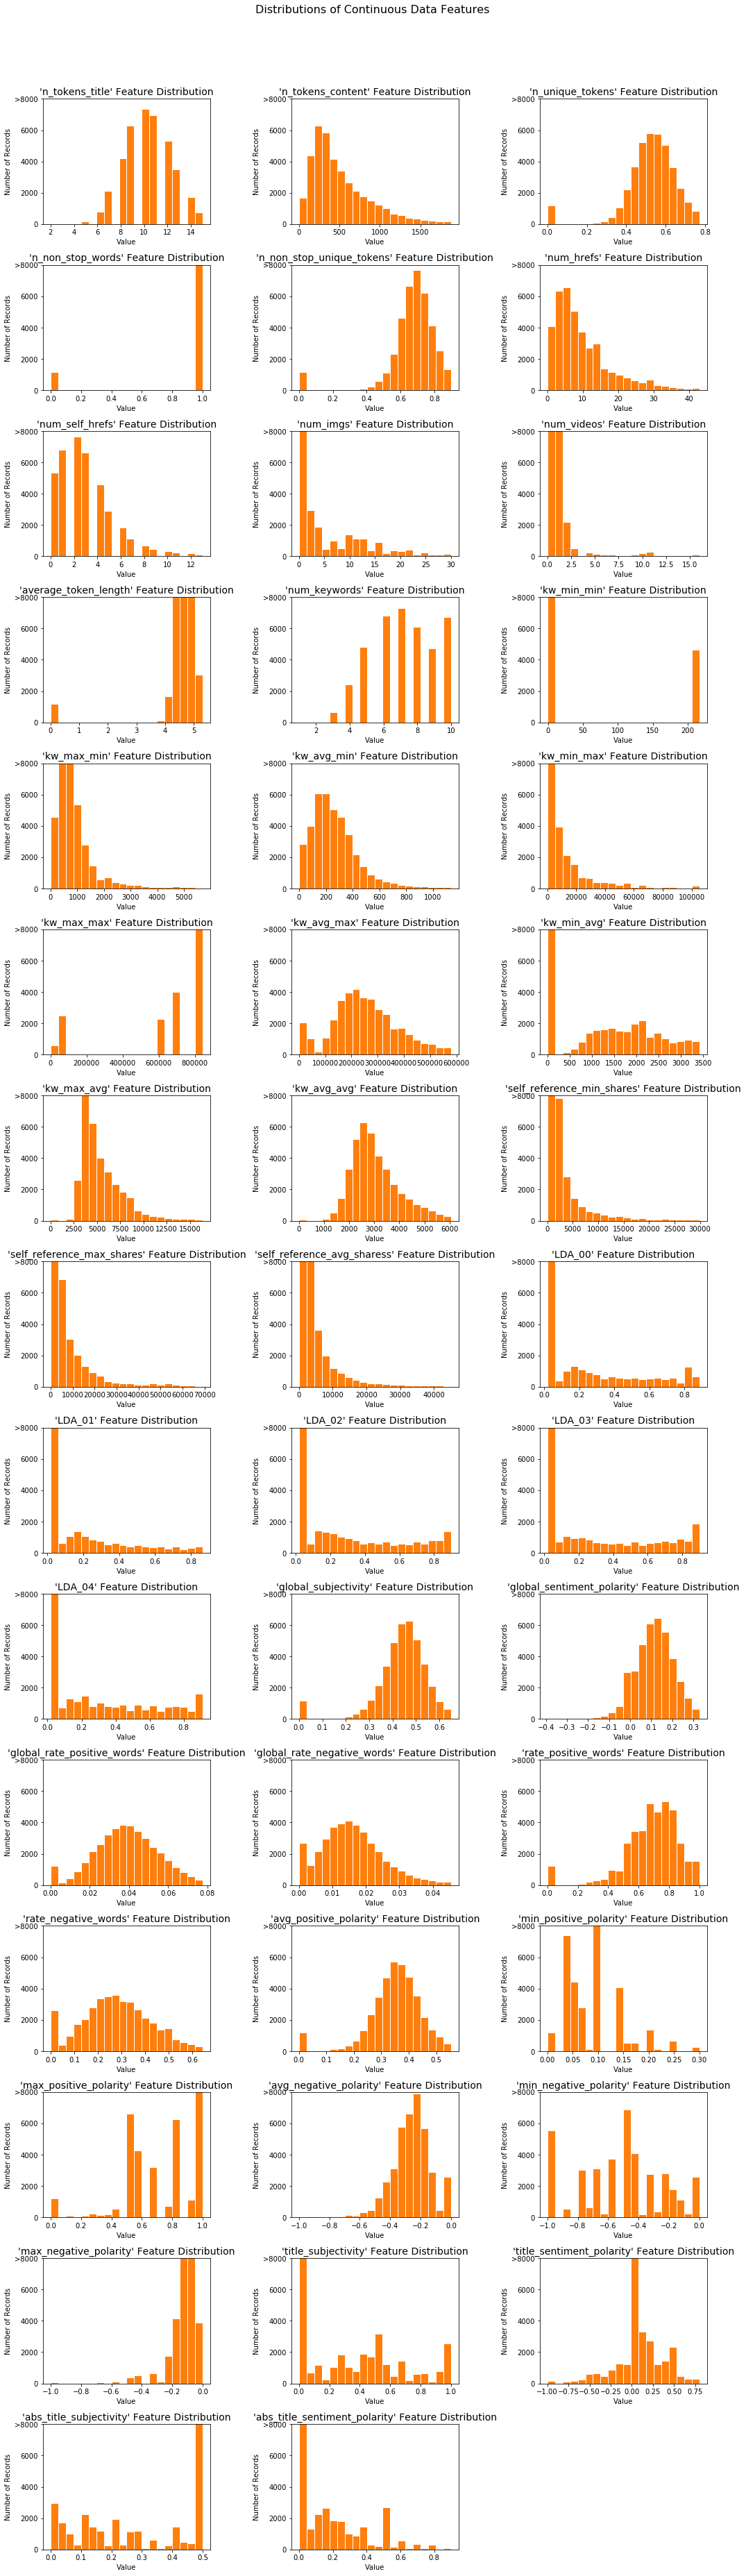

In [6]:
vs.distribution(data, colnames_list)

In [7]:
# extract features and target variable
feature_raw = data.drop(['shares'], axis=1)
label_raw = data['shares']

### Transforming Skewed Continuous Features

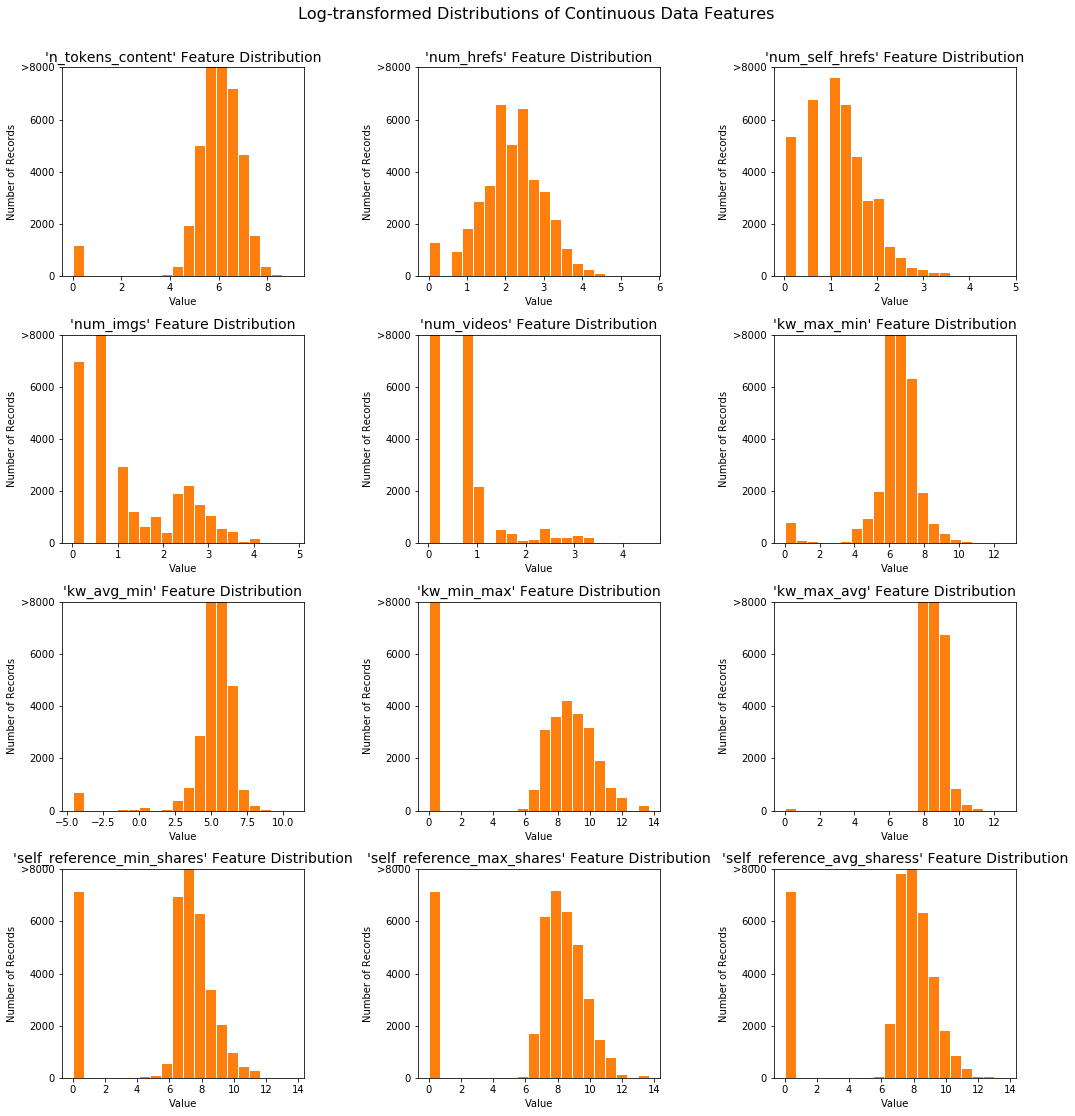

In [8]:
skewed_features = ['n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','kw_max_min',\
                  'kw_avg_min','kw_min_max','kw_max_avg','self_reference_min_shares',\
                  'self_reference_max_shares','self_reference_avg_sharess']
feature_raw[skewed_features] = data[skewed_features].apply(lambda x: np.log(x+1.01))
vs.distribution(data = feature_raw, colnames_list = skewed_features, transformed = True)

In [9]:
feature_raw[skewed_features].describe()

,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,kw_max_min,kw_avg_min,kw_min_max,kw_max_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess
count,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000
mean,5.890260,2.158201,1.212616,1.120942,0.408177,6.394122,5.209091,5.049378,8.482780,6.196983,6.919456,6.669447
std,1.254038,0.807957,0.690162,0.970957,0.677698,1.310113,1.604971,4.516212,0.581767,3.073323,3.428668,3.276549
min,0.009950,0.009950,0.009950,0.009950,0.009950,0.009950,-4.605170,0.009950,0.009950,0.009950,0.009950,0.009950
25%,5.509429,1.611436,0.698135,0.698135,0.009950,6.100341,4.961165,0.009950,8.178389,6.461484,7.003983,6.889729
50%,6.016182,2.198335,1.388791,0.698135,0.009950,6.493769,5.465990,7.244949,8.379471,7.090918,7.937735,7.696672
75%,6.575090,2.708717,1.611436,1.611436,0.698135,6.908765,5.880561,8.974746,8.703003,7.863655,8.987323,8.556608
max,9.044877,5.720345,4.762259,4.859890,4.521897,12.606194,10.664968,13.645079,12.606194,13.645079,13.645079,13.645079


### Normalizing Numerical Features

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature_raw[numerical_colnames] = scaler.fit_transform(feature_raw[numerical_colnames])
display(feature_raw.head(n=2))

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.476190,0.595879,0.663594,1.0,0.815385,0.280451,0.229781,0.141895,0.0,0.582024,...,0.378636,0.100000,0.7,0.65000,0.400,0.8,0.5,0.40625,0.0,0.1875
1,0.333333,0.612652,0.604743,1.0,0.791946,0.241462,0.144811,0.141895,0.0,0.611043,...,0.286915,0.033333,0.7,0.88125,0.875,0.9,0.0,0.50000,1.0,0.0000


In [11]:
features = feature_raw
# choose the median of shares to be the threshold for popularity (balance data)
threshold = np.median(label_raw)
labels = label_raw.map(lambda x: 1 if x >= threshold else 0)
print 'Setting threshold between popular and unpopular news to be the median of # of shares, which is ',threshold
print('{} percent of online news in dataset are popular'.format('{:.2f}'.format(float(sum(labels))/len(labels)*100)))

Setting threshold between popular and unpopular news to be the median of # of shares, which is  1400.0
53.36 percent of online news in dataset are popular


### Shuffle and Split Data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)
# split validation set from training set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
print('Training set has {} samples.'.format(X_train.shape[0]))
print('Validation set has {} samples.'.format(X_valid.shape[0]))
print('Testing set has {} samples.'.format(X_test.shape[0]))

Training set has 25371 samples.
Validation set has 6343 samples.
Testing set has 7929 samples.


## Evaluating Model Performance

### Naive Predictor Performace

In [13]:
# naive predicoter
accuracy = np.mean(labels == 1)

precision = np.mean(labels==1)
recall = 1.
fscore = 2*(precision*recall)/(precision+recall)

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5336, F-score: 0.6959]


### Creating a Training and Predicting Pipeline

In [14]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from time import time

def news_popularity_model(learner, sample_size, X_train, y_train, X_valid, y_valid):
    
    import random
    random.seed(42)
    # randomly select 'sample_size' samples from training set
    sample_index = random.sample(range(X_train.shape[0]), sample_size)
    X_train = X_train.iloc[sample_index]
    y_train = y_train.iloc[sample_index]
    
    result = {}
    
    # record the training time of learner
    start = time()
    learner.fit(X_train, y_train)
    end = time()
    result['train_time'] = end - start
    
    # make predictions on validation set and 500 random samples of training set
    random_index = random.sample(range(X_train.shape[0]), 500)
    start = time()
    valid_predictions = learner.predict(X_valid)
    train_predictions = learner.predict(X_train.iloc[random_index])
    end = time()
    
    result['pred_time'] = end - start
    
    # compute training accuracy on 500 random samples
    result['train_acc'] = accuracy_score(y_train.iloc[random_index], train_predictions)
    # compute testing accuracy
    result['valid_acc'] = accuracy_score(y_valid, valid_predictions)
    # compute f1_score on 500 random training samples
    result['train_fscore'] = f1_score(y_train.iloc[random_index], train_predictions)
    # compute f1_score on testing set
    result['valid_fscore'] = f1_score(y_valid, valid_predictions)
    # compute Area under ROC on 500 random training samples
    result['train_auc'] = roc_auc_score(y_train.iloc[random_index], train_predictions)
    # compute Area under ROC on testing samples
    result['valid_auc'] = roc_auc_score(y_valid, valid_predictions)
    
    print('{} trained on {} samples'.format(learner.__class__.__name__, sample_size))
    
    return result

### Initial Model Evaluation

GradientBoostingClassifier trained on 1268 samples
GradientBoostingClassifier trained on 5074 samples
GradientBoostingClassifier trained on 25371 samples
RandomForestClassifier trained on 1268 samples
RandomForestClassifier trained on 5074 samples
RandomForestClassifier trained on 25371 samples
AdaBoostClassifier trained on 1268 samples
AdaBoostClassifier trained on 5074 samples
AdaBoostClassifier trained on 25371 samples
SVC trained on 1268 samples
SVC trained on 5074 samples
SVC trained on 25371 samples


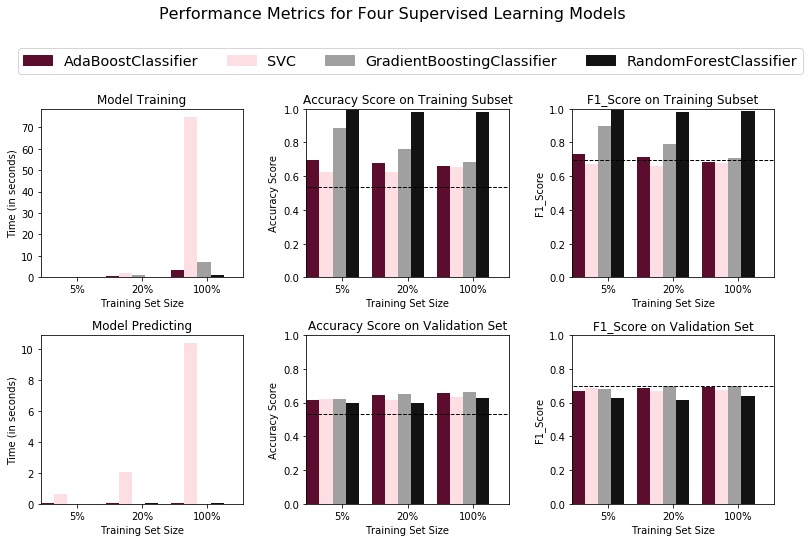

In [15]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
# initialize models
clf_a = GradientBoostingClassifier(random_state=42)
clf_b = RandomForestClassifier(random_state=42)
clf_c = AdaBoostClassifier(random_state=42)
clf_d = SVC(random_state=42)

# calculate the sample size for 5%, 20% and 100% samples
samples_5 = int(0.05*X_train.shape[0])
samples_20 = int(0.2*X_train.shape[0])
samples_100 = X_train.shape[0]

# collect results from learners
results = {}
for clf in [clf_a, clf_b, clf_c, clf_d]:
    clfname = clf.__class__.__name__
    results[clfname] = {}
    for i, sample_size in enumerate([samples_5, samples_20, samples_100]):
        results[clfname][i] = news_popularity_model(clf, sample_size, X_train, y_train, X_valid, y_valid)

vs.evaluate(results, accuracy, fscore)

In [16]:
learner_valid_acc = {names:results[names][2]['valid_acc'] for names in results.keys()}
print 'The best classifier is: ' + max(learner_valid_acc, key=learner_valid_acc.get)
print '\nThe performance of different classifiers on validation set:'
for c_name,c_acc in learner_valid_acc.iteritems():
    print c_name + ' acc: {:.4f}'.format(c_acc)

The best classifier is: GradientBoostingClassifier

The performance of different classifiers on validation set:
AdaBoostClassifier acc: 0.6593
SVC acc: 0.6360
GradientBoostingClassifier acc: 0.6603
RandomForestClassifier acc: 0.6262


In [23]:
learner_valid_f1 = {names:results[names][2]['valid_fscore'] for names in results.keys()}
print 'The best classifier is: ' + max(learner_valid_f1, key=learner_valid_f1.get)
print '\nThe performance of different classifiers on validation set:'
for c_name,c_f1 in learner_valid_f1.iteritems():
    print c_name + ' f1-score: {:.4f}'.format(c_f1)

The best classifier is: GradientBoostingClassifier

The performance of different classifiers on validation set:
AdaBoostClassifier f1-score: 0.6948
SVC f1-score: 0.6730
GradientBoostingClassifier f1-score: 0.6977
RandomForestClassifier f1-score: 0.6403


### Feature Selection --- Recursive Feature Elimination

In [17]:
from sklearn.feature_selection import RFE

def rfe_model(learner, search_range):
    
    fs_result = {}

    for i in search_range:
        selector = RFE(estimator = learner, n_features_to_select = i, step = 1)
        selector = selector.fit(X_train,y_train)
        learner.fit(X_train.iloc[:,selector.support_],y_train)
        fs_result[i] = accuracy_score(y_valid, learner.predict(X_valid.iloc[:,selector.support_]))
        print learner.__class__.__name__ + ' fitted using',i,'features'
        if i == search_range[0]:
            max_selector = selector
            current_max = fs_result[i]
        elif fs_result[i] > current_max:
            max_selector = selector
            current_max = fs_result[i]
        

    max_i = max(fs_result,key = fs_result.get)
    print learner.__class__.__name__ +' select {} features gives highest validation accuracy, which is {:.4f}'\
        .format(max_i,fs_result[max_i])
        
    return max_selector, fs_result

learner_a = GradientBoostingClassifier(random_state=42)
learner_b = AdaBoostClassifier(random_state=42)

GB_selector, GB_fs_result = rfe_model(learner_a, range(20,31))
ADA_selector, ADA_fs_result = rfe_model(learner_b, range(20,31))

GradientBoostingClassifier fitted using 20 features
GradientBoostingClassifier fitted using 21 features
GradientBoostingClassifier fitted using 22 features
GradientBoostingClassifier fitted using 23 features
GradientBoostingClassifier fitted using 24 features
GradientBoostingClassifier fitted using 25 features
GradientBoostingClassifier fitted using 26 features
GradientBoostingClassifier fitted using 27 features
GradientBoostingClassifier fitted using 28 features
GradientBoostingClassifier fitted using 29 features
GradientBoostingClassifier fitted using 30 features
GradientBoostingClassifier select 28 features gives highest validation accuracy, which is 0.6621
AdaBoostClassifier fitted using 20 features
AdaBoostClassifier fitted using 21 features
AdaBoostClassifier fitted using 22 features
AdaBoostClassifier fitted using 23 features
AdaBoostClassifier fitted using 24 features
AdaBoostClassifier fitted using 25 features
AdaBoostClassifier fitted using 26 features
AdaBoostClassifier fitt

In [22]:
def rfe_model(learner, search_range):
    
    fs_result = {}

    for i in search_range:
        selector = RFE(estimator = learner, n_features_to_select = i, step = 1)
        selector = selector.fit(X_train,y_train)
        learner.fit(X_train.iloc[:,selector.support_],y_train)
        fs_result[i] = accuracy_score(y_valid, learner.predict(X_valid.iloc[:,selector.support_]))
        print learner.__class__.__name__ + ' fitted using',i,'features'
        if i == search_range[0]:
            max_selector = selector
            current_max = fs_result[i]
        elif fs_result[i] > current_max:
            max_selector = selector
            current_max = fs_result[i]
        

    max_i = max(fs_result,key = fs_result.get)
    print learner.__class__.__name__ +' select {} features gives highest validation accuracy, which is {:.4f}'\
        .format(max_i,fs_result[max_i])
        
    return max_selector, fs_result

ADA_selector, ADA_fs_result = rfe_model(learner_b, range(30,41))

AdaBoostClassifier fitted using 30 features
AdaBoostClassifier fitted using 31 features
AdaBoostClassifier fitted using 32 features
AdaBoostClassifier fitted using 33 features
AdaBoostClassifier fitted using 34 features
AdaBoostClassifier fitted using 35 features
AdaBoostClassifier fitted using 36 features
AdaBoostClassifier fitted using 37 features
AdaBoostClassifier fitted using 38 features
AdaBoostClassifier fitted using 39 features
AdaBoostClassifier fitted using 40 features
AdaBoostClassifier select 30 features gives highest validation accuracy, which is 0.6595


In [27]:
print '28 features selected for GradientBoostingClassifier:\n',list(features.columns[GB_selector.support_])
print
print '30 features selected for AdaBoostClassifier:\n',list(features.columns[ADA_selector.support_])

28 features selected for GradientBoostingClassifier:
['n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_imgs', 'data_channel_is_entertainment', 'data_channel_is_socmed', 'data_channel_is_tech', 'kw_avg_min', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'min_positive_polarity', 'avg_negative_polarity', 'title_sentiment_polarity']

30 features selected for AdaBoostClassifier:
['n_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords', 'data_channel_is_entertainment', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_min_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference

In [30]:
# get reduced data for GradientBoostingClassifier and AdaBoostClassifier
GB_reduced_X_train = X_train.iloc[:,GB_selector.support_]
GB_reduced_X_valid = X_valid.iloc[:,GB_selector.support_]
GB_reduced_X_test = X_test.iloc[:,GB_selector.support_]

ADA_reduced_X_train = X_train.iloc[:,ADA_selector.support_]
ADA_reduced_X_valid = X_valid.iloc[:,ADA_selector.support_]
ADA_reduced_X_test = X_test.iloc[:,ADA_selector.support_]

### Parameter Tunning

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 14.5min
[Paralle

-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1966s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   17.3s finished


Too many dimensions to plot.
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=1, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=3,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=42,
              subsample=1.0, verbose=0, warm_start=False)
-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   10.6s remaining:   21.2s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   19.0s remaining:   23.7s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:   19.1s remaining:   15.3s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   30.8s remaining:   15.4s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  1.1min remaining:   18.8s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.4min finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    1.2s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    1.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:    2.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    2.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    2.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.1s finished


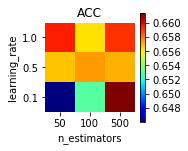

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=500, random_state=42)


In [31]:
# choose parameters that maximize the performance on validation set

import parfit.parfit as pf
from sklearn.model_selection import ParameterGrid

GB_paramGrid = ParameterGrid({'learning_rate':[0.1,0.05],
              'n_estimators':[100,300,500],
              'max_features': [1,0.5,0.1],
              'max_depth': [3,4,5,6],
              'min_samples_leaf':[3,5,9],
              'random_state':[42]})

GB_best_model, GB_best_score, GB_all_models, GB_all_scores = pf.bestFit(GradientBoostingClassifier, GB_paramGrid,\
     GB_reduced_X_train, y_train, GB_reduced_X_valid, y_valid, metric=accuracy_score, bestScore='max', scoreLabel='ACC')

print(GB_best_model)

ADA_paramGrid = ParameterGrid({'learning_rate':[1., 0.5, 0.1],
              'n_estimators':[50,100,500],
              'random_state':[42]})

ADA_best_model, ADA_best_score, ADA_all_models, ADA_all_scores = pf.bestFit(AdaBoostClassifier, ADA_paramGrid,\
     ADA_reduced_X_train, y_train, ADA_reduced_X_valid, y_valid, metric=accuracy_score, bestScore='max', scoreLabel='ACC')

print(ADA_best_model)

### Final Model Evaluation

In [34]:
# Report the before-and-afterscores
GB_best_predictions = GB_best_model.predict(GB_reduced_X_valid)
GB_test_predictions = GB_best_model.predict(GB_reduced_X_test)
print "Unoptimized GradientBoostingClassifier\n------"
print "Before feature selection and parameters tunning"
print "Accuracy score on validation data: {:.4f}".format(results['GradientBoostingClassifier'][2]['valid_acc'])
print "F-score on validation data: {:.4f}".format(results['GradientBoostingClassifier'][2]['valid_fscore'])
print "\nOptimized GradientBoostingClassifier\n------"
print "Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_valid, GB_best_predictions))
print "Final F-score on the validation data: {:.4f}".format(f1_score(y_valid, GB_best_predictions))
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, GB_test_predictions))
print "Final F-score on the testing data: {:.4f}".format(f1_score(y_test, GB_test_predictions))

ADA_best_predictions = ADA_best_model.predict(ADA_reduced_X_valid)
ADA_test_predictions = ADA_best_model.predict(ADA_reduced_X_test)
print "\nUnoptimized AdaBoostClassifier\n------"
print "Before feature selection and parameters tunning"
print "Accuracy score on validation data: {:.4f}".format(results['AdaBoostClassifier'][2]['valid_acc'])
print "F-score on validation data: {:.4f}".format(results['AdaBoostClassifier'][2]['valid_fscore'])
print "\nOptimized AdaBoostClassifier\n------"
print "Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_valid, ADA_best_predictions))
print "Final F-score on the validation data: {:.4f}".format(f1_score(y_valid, ADA_best_predictions))
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, ADA_test_predictions))
print "Final F-score on the testing data: {:.4f}".format(f1_score(y_test, ADA_test_predictions))

Unoptimized GradientBoostingClassifier
------
Before feature selection and parameters tunning
Accuracy score on validation data: 0.6603
F-score on validation data: 0.6977

Optimized GradientBoostingClassifier
------
Final accuracy score on the validation data: 0.6692
Final F-score on the validation data: 0.7033
Final accuracy score on the testing data: 0.6653
Final F-score on the testing data: 0.6913

Unoptimized AdaBoostClassifier
------
Before feature selection and parameters tunning
Accuracy score on validation data: 0.6593
F-score on validation data: 0.6948

Optimized AdaBoostClassifier
------
Final accuracy score on the validation data: 0.6614
Final F-score on the validation data: 0.6997
Final accuracy score on the testing data: 0.6577
Final F-score on the testing data: 0.6848


In [41]:
# recall on testing dataset
from sklearn.metrics import recall_score
recall_score(y_test, GB_test_predictions)

0.71253895948213852

## Feature Importance

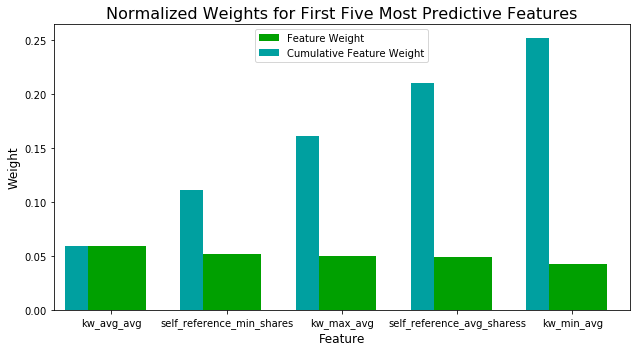

In [40]:
importances = GB_best_model.feature_importances_
vs.feature_plot(importances, GB_reduced_X_train, y_train)